In [ ]:
conda install -c conda-forge python-flair
conda install -c conda-forge textblob
conda install -c conda-forge vadersentiment

In [5]:
import pandas as pd
import numpy as np

In [6]:
dfs = []
file_list = [f'dataset/part-0{i}.json' for i in range(1,3)]
for i, file in enumerate(file_list):
    print(f'Reading file 0{i+1}....')
    data = pd.read_json(file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

df = pd.concat(dfs) 

Reading file 01....
Reading file 02....


In [7]:
df.shape

(2022505, 9)

In [8]:
df.head(5)

,review_id,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,helpful
0,rw5704482,raeldor-96879,After Life (2019– ),9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...","[1, 1]"
1,rw5704483,dosleeb,The Valhalla Murders (2019– ),6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,"[2, 2]"
2,rw5704484,brightconscious,Special OPS (2020– ),7.0,Nothing special,3 May 2020,0,"Except K K , no other actor looks comfortable ...","[0, 0]"
3,rw5704485,gasconyway,#BlackAF (2020– ),8.0,Good but,3 May 2020,0,I'm guessing that as a 62 year old white woman...,"[5, 9]"
4,rw5704487,mmason-15867,The Droving (2020),2.0,An honest review,3 May 2020,0,Here's the truth. There's not much to this mov...,"[26, 41]"


In [9]:
df.drop(columns=['review_id','reviewer', 'movie', 'review_summary',	'review_date', 'spoiler_tag', 'helpful'], inplace=True)


<AxesSubplot:ylabel='Frequency'>

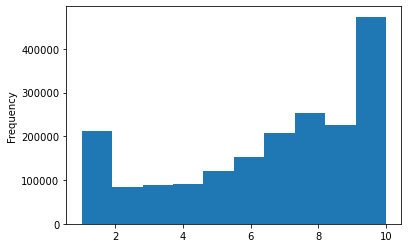

In [10]:
df['rating'].plot(kind='hist')

In [11]:
df.isna().sum()

rating           114980
review_detail         0
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.isna().sum()

rating           0
review_detail    0
dtype: int64

In [11]:
df.shape

(1907525, 2)

In [12]:
df.dtypes

rating           float64
review_detail     object
dtype: object

In [13]:
df['rating'].describe()

count    1.907525e+06
mean     6.691925e+00
std      3.056878e+00
min      1.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [14]:
# rating > 6 gets positive sentiment i.e. 1 and raing < 5 gets negative sentiment i.e. 0
def binary_rating(rating):
    if int(rating) > 6:
        return 1
    elif int(rating) < 5:
        return 0
    else:
        return np.nan
    
df['rating'] = df['rating'].apply(binary_rating)

In [15]:
df.head(3)

,rating,review_detail
0,1.0,"I enjoyed the first season, but I must say I t..."
1,NaN,I know Iceland is a small country and police d...
2,1.0,"Except K K , no other actor looks comfortable ..."


In [16]:
df.isna().sum()

rating           273935
review_detail         0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

rating           0
review_detail    0
dtype: int64

In [19]:
df.head(10)

,rating,review_detail
0,1.0,"I enjoyed the first season, but I must say I t..."
2,1.0,"Except K K , no other actor looks comfortable ..."
3,1.0,I'm guessing that as a 62 year old white woman...
4,0.0,Here's the truth. There's not much to this mov...
5,1.0,Having seen this film for the first time today...
6,1.0,The movie had some very impressive scenes. Esp...
7,1.0,I loved it from the first episode! And I could...
8,0.0,I see that Netflix has a teenage/kids audience...
9,0.0,This is the show for people for whom nothing e...
10,1.0,This is a fun and intriguing mystery. The acti...


In [20]:
pos = df[df['rating'] == 1].shape[0]/ df.shape[0] * 100
neg = df[df['rating'] == 0].shape[0]/ df.shape[0] * 100
print(f'Positive sentiment review %age: {pos} %')
print(f'Negative sentiment review %age: {neg} %')

Positive sentiment review %age: 70.92012071572427 %
Negative sentiment review %age: 29.079879284275734 %


In [21]:
df.rename(columns={'review_detail': 'review'}, inplace=True)

In [22]:
df = df[['review','rating']]

In [23]:
df.head(4)

,review,rating
0,"I enjoyed the first season, but I must say I t...",1.0
2,"Except K K , no other actor looks comfortable ...",1.0
3,I'm guessing that as a 62 year old white woman...,1.0
4,Here's the truth. There's not much to this mov...,0.0


In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df.head(4)

,review,rating
0,"I enjoyed the first season, but I must say I t...",1.0
1,"Except K K , no other actor looks comfortable ...",1.0
2,I'm guessing that as a 62 year old white woman...,1.0
3,Here's the truth. There's not much to this mov...,0.0


In [26]:
df = df.astype({"rating": np.uint8})
df.dtypes

review    object
rating     uint8
dtype: object

In [27]:
df.head(5)

,review,rating
0,"I enjoyed the first season, but I must say I t...",1
1,"Except K K , no other actor looks comfortable ...",1
2,I'm guessing that as a 62 year old white woman...,1
3,Here's the truth. There's not much to this mov...,0
4,Having seen this film for the first time today...,1


# Preprocessing

In [33]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [58]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [34]:

def clean_review(review):
    alpha_only = re.sub("[^a-zA-Z]", " ", review)
    lower = alpha_only.lower()
    words = lower.split()
    stop = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    meaningful_words  = [lemmatizer.lemmatize(word) for word in words if word not in stop]
    return ' '.join(meaningful_words)

In [36]:
print(df.iloc[9770,0])
print('---------------------')
print(clean_review(df.iloc[9770,0]))

"Stalker" is a work that amazes people with many memories and keeps its freshness even today. It is a film that has been ignored at the grand prize ceremony and has been criticized by the Soviet regime. But it deserves to be called one of the director's most daring films to the end. Regardless of whether or not you agree with Tarkovsky's career that has been overwhelmed with faith in the world at times, the sense of admiration created by the film's grand finale never loses its effect. Even years later.
---------------------
stalker work amazes people many memory keep freshness even today film ignored grand prize ceremony criticized soviet regime deserves called one director daring film end regardless whether agree tarkovsky career overwhelmed faith world time sense admiration created film grand finale never loses effect even year later


In [46]:
df['review'] = df['review'].apply(clean_review)

In [47]:
from sklearn.model_selection import train_test_split
x = df['review']
y = df['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [48]:
len(x_train)

1225192

In [39]:
len(x_test), len(y_test)

(408398, 408398)

# TextBlob

In [40]:
from textblob import TextBlob

In [41]:
def blob_sentiment(review):
    polarity = TextBlob(review).sentiment.polarity
    if polarity >= 0:
        return 1
    return 0

In [42]:
from sklearn.metrics import accuracy_score, classification_report

In [44]:
x_test

1366253    American Psycho is a movie that digs psycholog...
525008     This film comes from a fantastic novel dealing...
168029     Paul Greengrass is the creator of one of the m...
1050807    This show has been so well written for two sea...
1511321    This is a pilot that Aaron Sorkin sets in moti...
                                 ...                        
16688      You know, the Scary Movie franchise might have...
1537329    I don't think it's among the best ones but I d...
1237568    Fantastic movie!!! Lots of horror, action and ...
1306153    This is the episode I have been waiting for th...
752654     Society is society, everyone struggles in thei...
Name: review, Length: 408398, dtype: object

In [45]:
predictions = x_test.apply(lambda x : blob_sentiment(x))
accuracy_score(predictions,y_test)

0.7979911752750993

In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [50]:
def vader_sentiment(review):
    vs = analyzer.polarity_scores(review)
    return int(vs.get("compound")>0)

In [51]:
predictions = x_test.apply(lambda x : vader_sentiment(x))
accuracy_score(predictions,y_test)

0.7645874857369527

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.52      0.56    118938
           1       0.82      0.86      0.84    289460

    accuracy                           0.76    408398
   macro avg       0.71      0.69      0.70    408398
weighted avg       0.76      0.76      0.76    408398



In [53]:
from flair.models import TextClassifier
from flair.data import Sentence

In [54]:
classifier = TextClassifier.load('en-sentiment')
def flair_sentiment(review):
    sentence = Sentence(review)
    classifier.predict(sentence)
    return np.round(sentence.labels[0].score)

2023-02-11 05:52:08,754 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to C:\Users\shubh\AppData\Local\Temp\tmpjee81lom


100%|██████████| 265512723/265512723 [00:34<00:00, 7614955.53B/s] 

2023-02-11 05:52:43,936 copying C:\Users\shubh\AppData\Local\Temp\tmpjee81lom to cache at C:\Users\shubh\.flair\models\sentiment-en-mix-distillbert_4.pt


2023-02-11 05:52:44,043 removing temp file C:\Users\shubh\AppData\Local\Temp\tmpjee81lom
2023-02-11 05:52:44,059 loading file C:\Users\shubh\.flair\models\sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
predictions = x_test.apply(lambda x : flair_sentiment(x))
accuracy_score(predictions,y_test)